In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# 2.1 Завантаження датасету

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()
base_dir = 'cats_and_dogs_filtered'

In [ ]:
#Задаю змінні, які містять в собі шлях до тренувальних і валідаційних данних
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')


# Тренировочные данные с котами
train_cats_dir = os.path.join(train_dir, 'cats')
# Проверочные данные с котами
validation_cats_dir = os.path.join(validation_dir, 'cats')


# Тренировочные данные с собаками
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Проверочные данные с собаками
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
#Відображення 5 єлементів Котів і собак
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:5])

['cat.58.jpg', 'cat.963.jpg', 'cat.686.jpg', 'cat.799.jpg', 'cat.320.jpg']
['dog.77.jpg', 'dog.70.jpg', 'dog.421.jpg', 'dog.14.jpg', 'dog.82.jpg']


In [ ]:
#ПРоверям кол-во картинок в датасете.
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
%matplotlib inline

# Параметры для нашего графа; мы будем выводить изображения в конфигурации 4x4
nrows = 4
ncols = 4

# Индекс для итерации по изображениям
pic_index = 0

In [ ]:
# Настраиваем фигуру matplotlib и устанавливаем ее размер, чтобы поместилась картинка 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Устанавливаем подплощадку; индексы подплощадок начинаются с 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Не показывать оси (или линии сетки)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 2.3 Побудова згорткову (convolutional) нейронну мережу
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# нормалізвція
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Настройка генератора для обучающих данных
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Путь к директории, содержащей обучающие изображения.
        target_size=(150, 150),  # Все изображения будут изменены до  150x150 пикселей.
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Настройка генератора для данных валидации
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/15
100/100 - 10s - loss: 0.7206 - acc: 0.5340 - val_loss: 0.6469 - val_acc: 0.6540 - 10s/epoch - 102ms/step
Epoch 2/15
100/100 - 4s - loss: 0.6329 - acc: 0.6565 - val_loss: 0.5915 - val_acc: 0.6900 - 4s/epoch - 45ms/step
Epoch 3/15
100/100 - 4s - loss: 0.5797 - acc: 0.6940 - val_loss: 0.5666 - val_acc: 0.7040 - 4s/epoch - 45ms/step
Epoch 4/15
100/100 - 7s - loss: 0.5213 - acc: 0.7490 - val_loss: 0.5287 - val_acc: 0.7410 - 7s/epoch - 67ms/step
Epoch 5/15
100/100 - 4s - loss: 0.4730 - acc: 0.7715 - val_loss: 0.5221 - val_acc: 0.7650 - 4s/epoch - 45ms/step
Epoch 6/15
100/100 - 5s - loss: 0.4264 - acc: 0.7935 - val_loss: 0.6328 - val_acc: 0.6980 - 5s/epoch - 55ms/step
Epoch 7/15
100/100 - 5s - loss: 0.3776 - acc: 0.8285 - val_loss: 0.6487 - val_acc: 0.7010 - 5s/epoch - 47ms/step
Epoch 8/15
100/100 - 5s - loss: 0.3160 - acc: 0.8650 - val_loss: 0.7645 - val_acc: 0.6910 - 5s/epoch - 53ms/step
Epoch 9/15
100/100 - 5s - loss: 0.2520 - acc: 0.8915 - val_loss: 0.8993 - val_acc: 0.6620 - 5

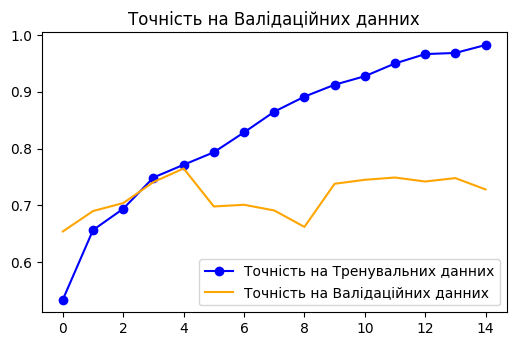

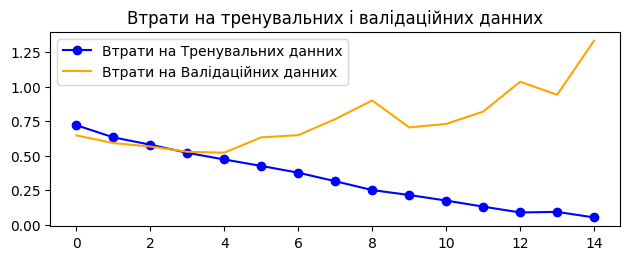

In [ ]:
# Получение списка результатов точности на обучающих и проверочных данных
# наборы для каждой эпохи обучения
acc = history.history['acc']
val_acc = history.history['val_acc']

# Получение списка результатов на тренировочных и проверочных данных
# наборы для каждой эпохи обучения
loss = history.history['loss']
val_loss = history.history['val_loss']

# Получение количество эпох
epochs = range(len(acc))

plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
# График точности обучения и проверки за эпоху
plt.plot(epochs, acc,'bo-', label='Точність на Тренувальних данних')
plt.plot(epochs, val_acc,'orange', label='Точність на Валідаційних данних')
plt.title('Точність на Валідаційних данних')
plt.legend()

plt.figure()

plt.subplot(2,1,2)
# График потерь при обучении и проверке за эпоху
plt.plot(epochs, loss,'bo-', label='Втрати на Тренувальних данних')
plt.plot(epochs, val_loss,'orange', label='Втрати на Валідаційних данних')
plt.title('Втрати на тренувальних і валідаційних данних')
plt.legend()

plt.tight_layout()

plt.show()